In [14]:
from IPython.display import display, Math, Latex

In [11]:
from sympy import *
x = IndexedBase('x')
j,k,k = symbols('j k l', cls=Idx)
init_printing(use_latex=True)

## **Remark**
Indices should be defined with care as Python in a standard way starts indices with a 0 while we use 1 in the lecture. Use, e.g., 

xv = Matrix([x[i] for i in range(1,3)])

to generate the state vector $[x_1,x_2]$.

# Example for Lie bracket computation 

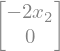

In [36]:
fv = Matrix([x[2]**2,0])
gv = Matrix([0,1])
xv = Matrix([x[i] for i in range(1,3)])
liebrack = gv.jacobian(xv)*fv-fv.jacobian(xv)*gv
display(liebrack)

# Build functions

In [37]:
def LieBracket(f,g,x):
    return g.jacobian(x)*f-f.jacobian(x)*g

def LieDerv(h,f,x):
    return (h.jacobian(x)*f)[0]

# Validation

## Lie bracket

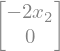

In [38]:
lb_fg = LieBracket(fv,gv,xv)
display(lb_fg)

## Lie derivative

In [40]:
h = Matrix([sin(x[1]*exp(-x[2]))]) #use Matrix to make attribute jacobian available
ld_hf = LieDerv(h,fv,xv)
display(ld_hf)

## **Remark**
You might want to also check the class **diffgeom** of sympy.

# Working with Lie brackets and distributions
## 1. Set up a distribution and check for involutivity

In [41]:
f1 = Matrix([1,0,-x[2],0,x[2]**2])
f2 = Matrix([0,1,x[1],x[1]**2,0])
xv = Matrix([x[i] for i in range(1,6)])

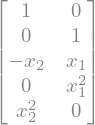

In [21]:
Dist1 = Matrix([f1.T,f2.T]).T
display(Dist1)
Dist1.rank()

### Append Lie bracket between f1 and f2

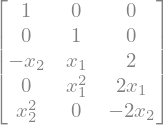

In [43]:
Dist2 = Dist1.col_insert(3,LieBracket(f1,f2,xv))
display(Dist2)
Dist2.rank()

Obviously the distribution is **not involutive** as appending the Lie bracket between f1 and f2 increases the dimension. 

## 2. Analyse controllability assuming that f1 and f2 refer to the input vector fields of a nonlinear system without drift vector field (see Example 3.2 of the lecture notes)

### Set up controllability distribution (manually)

In [44]:
lb12 = LieBracket(f1,f2,xv)
lb112 = LieBracket(f1,lb12,xv)
lb212 = LieBracket(f2,lb12,xv)

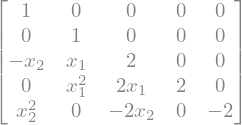

In [45]:
DistContr = (BlockMatrix([f1,f2,lb12,lb112,lb212])).as_explicit()
display(DistContr)

In [46]:
DistContr.rank()

According to Theorem 3.1 the system $\dot{\mathbf{x}}=\mathbf{f}_1u_1+\mathbf{f}_2 u_2$ is locally controllable. 